# Algorithms of Scientific Computing

## Exercise 1


In the last worksheet we showed that the $a_k$ and $b_k$ can be computed by
\begin{equation}
    c_k = \frac{1}{12} \sum\limits_{l=0}^{11} X_l e^{-i2\pi kl/12},
\end{equation}
i.e. by a DFT.

Use the idea of the Fast Fourier Transformation, to reduce this DFT of length 12 to the computation of some DFTs of length 6 or 3, respectively.

Use the fact that all $X_l \in \mathbb{R}$.

Draw a diagram, that shows the needed computation steps or write an appropriate program (for example in Python).

[ 7.80583333e+02+0.00000000e+00j -2.05507183e+02+3.60113946e+02j
  2.17083333e+01+1.08253175e+00j -2.16666667e+00-2.75000000e+00j
 -5.41666667e-01+5.05181486e-01j  1.73850033e-01+1.36053580e-01j
  8.33333333e-02+0.00000000e+00j]


C:\Users\rados\AppData\Local\Temp\ipykernel_6704\4091171764.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  c1 = np.sum(X[l]*cmath.exp(-1j*2*math.pi*l/3) for l in range(3))


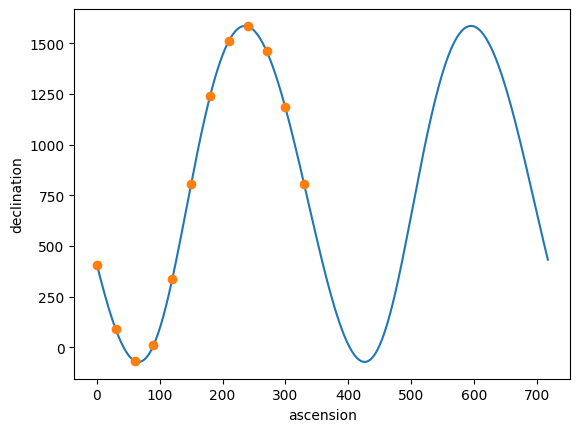

In [7]:
#TODO import
import numpy as np
import cmath
import math

def dft3(X):
    c0 = np.sum(X)
    c1 = np.sum(X[l]*cmath.exp(-1j*2*math.pi*l/3) for l in range(3))
    c2 = c1.conjugate()
    
    return [c0, c1, c2]

def rfft6(X):
    a = dft3([X[2*l] for l in range(3)])
    b = dft3([X[2*l+1] for l in range(3)])
    c1 = [a[k] + cmath.exp(-math.pi*k*1j/3)*b[k] for k in range(3)] + [a[0] - b[0]]
    c2 = [c1[6-k].conjugate() for k in range(4,6)]
    return c1 + c2 
    
def rfft12(X):
    a = rfft6([X[2*l] for l in range(6)])
    b = rfft6([X[2*l+1] for l in range(6)])
             
    c1 = [(a[k]+cmath.exp(-math.pi*k*1j/6)*b[k])/12 for k in range(0,6)] + [(a[0]-b[0])/12]
    #c2 = [c[12-k].conjugate for k in range(7,12)]
    
    return c1 


## test with last WS data to see if this work
import matplotlib.pyplot as plt

X = [408, 89, -66, 10, 338, 807, 1238, 1511, 1583, 1462, 1183, 804]

c = np.array(rfft12(X))
print (c)

a = c.real
a[1:6] = 2*a[1:6]
b = -2*c[1:6].imag

#generate interpolation point
def Xint_gen(a,b,t):
    return sum([a[k]*math.cos(math.pi*k*t/180) for k in range(0,7)]) + \
        sum([b[k-1]*math.sin(math.pi*k*t/180) for k in range(1,6)])

# plotting interpolation results and initial data
resolution = 2
plt.plot(range(0,720,resolution), [Xint_gen(a,b,t) for t in range(0,720,resolution)])
plt.plot(range(0,360,30), X, 'o');
plt.xlabel('ascension')
plt.ylabel('declination')
plt.show()